## Chapter 4 -  Training Models

### Polynomial Regression

In cases where the model is more complex than a straight line, we use polynomial regression to fit the data. The following example uses a polynomial regression function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

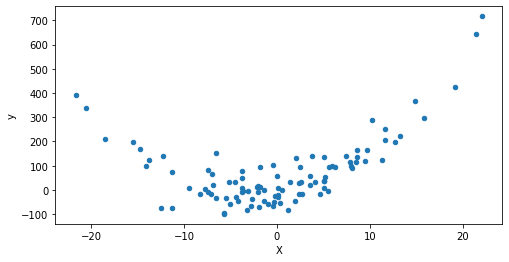

In [4]:
# Generate y = X^2 - 6X + 5 with noise N(0,1)
m = 100
X = np.random.normal(0,10,m).flatten()
y = X**2 + 6 * X + 5 + np.random.normal(0,50,m).flatten()
df_Xy = pd.DataFrame({'X' : X, 'y' : y})
df_Xy.plot(kind='scatter', x='X', y='y', figsize=(8,4))
plt.show()

Clearly, a straight line cannot fit this dataset, so we need to transform the training data to add the square of each feature as new features.

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_b = np.c_[X]
print(X_b[:3])
X_poly = poly_features.fit_transform(X_b)
print(X_poly[:3])

[[ 3.57874059]
 [10.2320901 ]
 [22.01794795]]
[[  3.57874059  12.80738419]
 [ 10.2320901  104.69566785]
 [ 22.01794795 484.79003191]]


In [7]:
# Train
reg = LinearRegression()
reg.fit(X_poly, y)
print(reg.intercept_, reg.coef_)

-5.215304103257694 [6.36000123 1.06776319]


In [8]:
poly_theta_hat = np.concatenate([np.array([reg.intercept_,]), reg.coef_])
print(poly_theta_hat)

[-5.2153041   6.36000123  1.06776319]


In [9]:
# Test the model using new X_test
lin_X = np.linspace(X.min(), X.max(),m)
# Intercept to largest power of X
lin_X_b = np.c_[np.ones(m), lin_X, lin_X*lin_X]
lin_y = np.dot(lin_X_b, poly_theta_hat)
y_test = np.c_[lin_X, lin_y]
df_y_test = pd.DataFrame(y_test, columns=['X', 'y'])

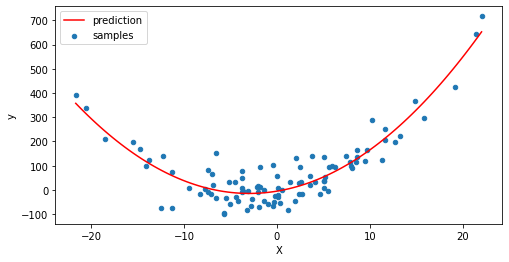

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax)
df_y_test.plot(kind='line', x='X', y='y', ax=ax, color='red')
ax.legend(['prediction', 'samples',])
plt.show()

### Learning Curves